<h1 style="text-align: center;">ОПРЕДЕЛЕНИЕ ВОЗРАСТА ПО ФОТО</h1>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Постановка задачи</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Импорт-библиотек-и-определение-констант" data-toc-modified-id="Импорт-библиотек-и-определение-констант-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Импорт библиотек и определение констант</a></span></li><li><span><a href="#Загрузка-и-обзор-данных" data-toc-modified-id="Загрузка-и-обзор-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузка и обзор данных</a></span></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Признак-возраста" data-toc-modified-id="Признак-возраста-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Признак возраста</a></span></li><li><span><a href="#Признак-фото" data-toc-modified-id="Признак-фото-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Признак фото</a></span></li></ul></li><li><span><a href="#Моделирование" data-toc-modified-id="Моделирование-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Моделирование</a></span><ul class="toc-item"><li><span><a href="#Обучение-и-валидация" data-toc-modified-id="Обучение-и-валидация-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Обучение и валидация</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Анализ</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист" data-toc-modified-id="Чек-лист-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист</a></span></li></ul></div>

## Описание проекта
Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
 - анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
 - контролировать добросовестность кассиров при продаже алкоголя.

### Постановка задачи
Постройте модель, которая по фотографии определит приблизительный возраст человека. Используйте MAE, как метрику качества. **Важно:** значение MAE на тестовой выборке должно быть менее 8 лет.
 
**Ход решения:**
 - проведите исследовательский анализ данных, 
 - подготовьте данные к обучению, 
 - обучите нейронную сеть и рассчитайте её качество.

### Описание данных 
В вашем распоряжении набор фотографий с людьми и указанием их возраста.

**Признаки:**
 - file_name - имя фото с человеком. 

**Целевой признак:**
 - real_age — возраст человека.
 
## Импорт библиотек и определение констант

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#фиксируем:
# - пути к файлам
PATH_IMG = '/datasets/faces/final_files'
PATH_CSV = '/datasets/faces/labels.csv'
# - значение для механизма псевдослучайности
SEED = 34139

## Загрузка и обзор данных
Поместим данные в DataFrame. На примере нескольких строк оценим датасет визульно. Посмотрим на общую информацию.

In [3]:
df = pd.read_csv(PATH_CSV)
df.sample(5)

,file_name,real_age
5193,005193.jpg,36
599,000599.jpg,5
3048,003048.jpg,39
12,000012.jpg,2
6920,006931.jpg,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


Типы данных определены верно, данные интерпретированы корректно, пропуски отсутствуют. Предобработка данных не требуется.
## Исследовательский анализ
### Признак возраста 
Рассмотрим распределение признака `real_age`, а также его описательную статистику. 

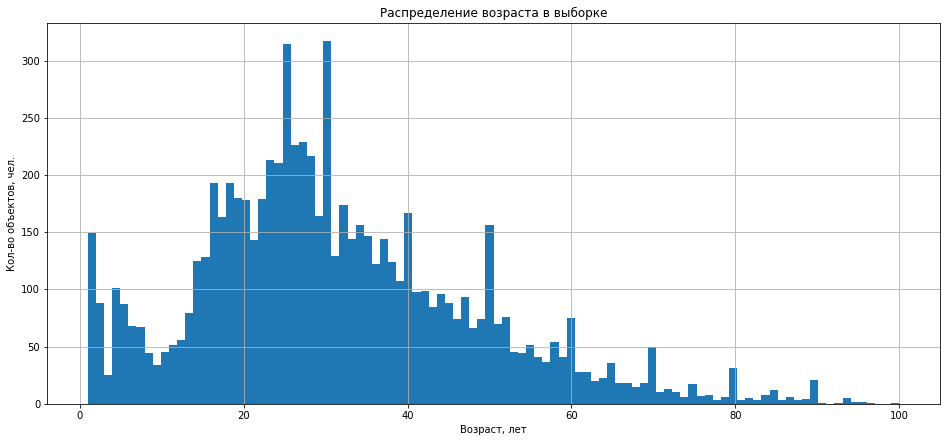

In [5]:
fig, ax = plt.subplots(figsize=(16,7))
ax.hist(df['real_age'], bins=100)
ax.grid()
ax.set_title('Распределение возраста в выборке') 
ax.set_xlabel('Возраст, лет') 
ax.set_ylabel('Кол-во объектов, чел.') 
fig.show()

In [6]:
df.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


Зафиксируем наблюдения: 
 - с т.з. диапазона значений данные выглядят правдоподобно, 
 - медианное и среднее значения возраста отличаются незначительно, 
 - подавляющее большинство участников выборки - в возрасте от 15 до 40 лет, 
 - особенностью выборки являются пики на возрастах 1, 25, 30, 40, 50, 60, 70, 80, 90 лет. Причиной тому может быть наличие в датасете целевых групп или округление возраста. 
 
Смещение выборки к диапазону 15-40 лет, вероятно, ослабит предсказательную способность модели в других возрастных диапазонах.
### Признак фото 
Рассмотрим датасет на примере 16 случайно отобранных фотографий.

In [7]:
data_generator = ImageDataGenerator(rescale=1/255., validation_split=0.25)
flow = data_generator.flow_from_dataframe(
    dataframe=df, 
    directory=PATH_IMG, 
    x_col='file_name', 
    y_col='real_age',     
    class_mode='raw', 
    batch_size=16, 
    subset='training', 
    seed=SEED
)

Found 5694 validated image filenames.


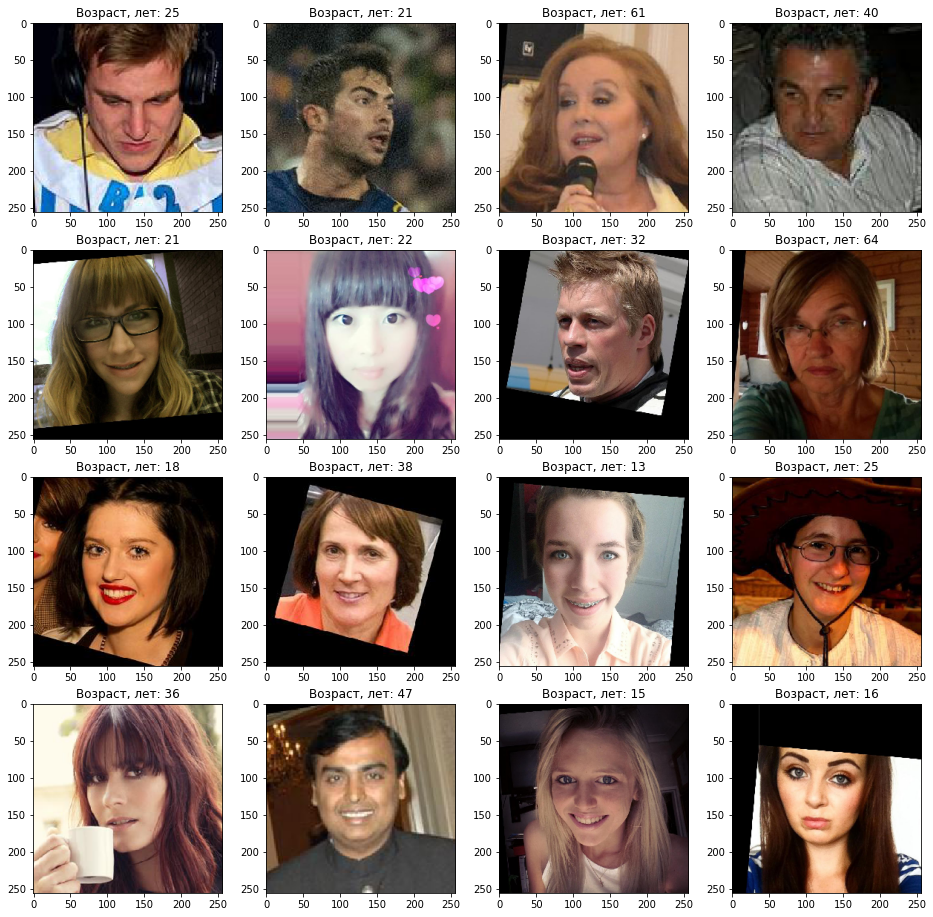

In [8]:
X, y = flow.next()
ax_count = 4
fig, ax = plt.subplots(ax_count, ax_count, figsize=(16, 16))
for i in range(ax_count):
    for j in range(ax_count):
        data_index = i * ax_count + j
        img = X[data_index]
        age = y[data_index]
        ax[i][j].imshow(img)
        ax[i][j].set_title('Возраст, лет: {0}'.format(age))

Зафиксируем наблюдения: 
 - явных противоречий между человеком на фото и его возрастом не замечено, что указывает на удовлетворительное качество разметки, 
 - в выборке представлены люди различных рас, 
 - на многих фото присутствуют предметы, загораживающие и/или меняющие лицо (головные уборы, очки, наушники, микрофоны, кружки), 
 - во многих случаях люди на фото улыбаются, 
 - в выборке присутствуют аугментации (повороты). 
 
Известно, что возрастные признаки на лицах людей разных рас отличаются. Например, у европеоидов в сравнении с монголоидами и негроидами гораздо сильнее выражены возрастные морщины. Этот фактор, как и посторонние предметы, а также не нейтральное выражение лиц добавит шума к данным и, т.о., усложнит задачу для нейронной сети. 

Кроме того, качество разметки рассмотренного нами примера нельзя распространить на весь датасет. 
## Моделирование
Перед нами задача регрессии с применением компьютерного зрения. Решим ее с помощью сверточной нейронной сети ResNet50 на GPU. 

Зафиксируем детали дальнейшего исследования:
 - обучающую и тестовую выборки определим долями в 75% и 25% соответственно, 
 - аугментациями в форме отражений и сдвигов компенсируем относительно малый объем обучающей выборки, 
 - используем механизм Early Stopping, чтобы остановить обучение при достижении MAE < 6.5 на тестовой выборке, 
 - выведем на экран значения функции потерь и метрики для дальнейшей визуализации,  
 - свойства модели: 
     - используем начальные веса ImageNet,
     - верхние слои модели изменим соответственно решаемой задаче, 
     - в качестве функции оптимизации используем алгоритм Adam.

### Обучение и валидация     
Ниже приведен код для обучения и валидации модели на GPU.

```python
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
import pandas as pd

#реализуем класс с логикой для Early Stopping
class EarlyStoppingByValMae(Callback):
    def __init__(self, monitor='val_mae', value=6.5, verbose=1):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn(
                'Early stopping requires {0} available!'.format(self.monitor), 
                RuntimeWarning
            )
        if current < self.value:
            if self.verbose > 0:
                print(
                    'Epoch {0}: early stopping by {1} threshold ({2})'.format(
                        epoch, 
                        self.monitor, 
                        self.value
                    )
                )
            self.model.stop_training = True

            
def load_train(path):
    path_csv = path + '/labels.csv'
    path_img = path + '/final_files'
    seed_value = 33794
    #инициализируем генератор данных 
    #для обучающей выборки
    data_generator = ImageDataGenerator(        
        validation_split=0.25, 
        rescale=1./255, 
        horizontal_flip=True, 
        vertical_flip=True, 
        width_shift_range=0.15, 
        height_shift_range=0.15        
    )        
    #инициализируем поток данных 
    #для обучающей выборки
    flow = data_generator.flow_from_dataframe(
        dataframe=pd.read_csv(path_csv), 
        directory=path_img, 
        x_col='file_name', 
        y_col='real_age', 
        class_mode='raw', 
        subset='training', 
        seed=seed_value
    )    
    return flow


def load_test(path):
    path_csv = path + '/labels.csv'
    path_img = path + '/final_files'
    seed_value = 33794
    #инициализируем генератор данных 
    #для тестовой выборки
    data_generator = ImageDataGenerator(        
        validation_split=0.25, 
        rescale=1./255,         
    )        
    #инициализируем поток данных 
    #для тестовой выборки
    flow = data_generator.flow_from_dataframe(
        dataframe=pd.read_csv(path_csv), 
        directory=path_img, 
        x_col='file_name', 
        y_col='real_age', 
        class_mode='raw', 
        subset='validation', 
        seed=seed_value
    )    
    return flow


def create_model(input_shape):
    #инициализируем ResNet50 без 
    #верхних слоев с весами ImageNet
    rn50 = ResNet50(
        input_shape=input_shape,
        weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
        include_top=False
        )
    #инициализируем модель
    model = Sequential()
    #добавляем в качестве нижних слоев ResNet50
    model.add(rn50)
    #верхние слои адаптируем для нашей задачи
    model.add(GlobalAveragePooling2D())    
    model.add(Dense(units=1, activation='relu'))
    #компилируем модель с функциями потерь, оптимизации и метрикой качества 
    model.compile(loss='mse', optimizer=Adam(lr=0.00015), metrics=['mae'])
    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=20, steps_per_epoch=None, validation_steps=None):
    #инициализируем класс для Early Stopping
    callback = EarlyStoppingByValMae()
    #запускаем обучение и валидацию модели
    hist = model.fit(train_data, 
              validation_data=test_data, 
              batch_size=batch_size, 
              epochs=epochs, 
              steps_per_epoch=steps_per_epoch, 
              validation_steps=validation_steps, 
              verbose=2, 
              shuffle=True, 
              callbacks=[callback]
             )
    #выводим на экран значения функции потерь и метрики
    print('Train losses:', hist.history['loss'], 
         '\nTrain metrics:', hist.history['mae'], 
         '\nValidation losses:', hist.history['val_loss'], 
         '\nValidation metrics:', hist.history['val_mae'])
    return model
```

Ниже приведены результаты обучения и валидации модели в формате вывода на экран.

```
Train for 178 steps, validate for 60 steps

Epoch 1/20
178/178 - 116s - loss: 234.1458 - mae: 11.2120 - val_loss: 846.2219 - val_mae: 24.2114

Epoch 2/20
178/178 - 109s - loss: 116.0872 - mae: 8.2434 - val_loss: 663.0403 - val_mae: 20.6296

Epoch 3/20
178/178 - 107s - loss: 97.0668 - mae: 7.4699 - val_loss: 413.4409 - val_mae: 15.7355

Epoch 4/20
178/178 - 109s - loss: 84.5946 - mae: 7.0179 - val_loss: 147.3040 - val_mae: 9.3876

Epoch 5/20
178/178 - 106s - loss: 74.0479 - mae: 6.5894 - val_loss: 89.5855 - val_mae: 7.1212

Epoch 6/20
178/178 - 108s - loss: 66.7693 - mae: 6.2849 - val_loss: 172.6188 - val_mae: 9.7874

Epoch 7/20
178/178 - 107s - loss: 61.6700 - mae: 6.0200 - val_loss: 98.2171 - val_mae: 7.6135

Epoch 8/20
178/178 - 107s - loss: 54.2231 - mae: 5.7080 - val_loss: 88.7457 - val_mae: 7.1953

Epoch 9/20
Epoch 8: early stopping by val_mae threshold (6.5)
178/178 - 108s - loss: 53.0809 - mae: 5.6210 - val_loss: 77.9855 - val_mae: 6.4325

Train losses: [233.8895436679852, 116.0779996335318, 97.05961346534164, 84.59997018881752, 74.05038851438843, 66.77647654617465, 61.67519541460043, 54.218538571710454, 53.08472604352966] 

Train metrics: [11.212002, 8.243419, 7.469898, 7.0178504, 6.5893874, 6.284882, 6.019999, 5.708039, 5.6210117] 

Validation losses: [846.2219065348307, 663.0402526855469, 413.4408915201823, 147.30395164489747, 89.58547054926554, 172.61877937316893, 98.21711552937826, 88.74565512339274, 77.98550510406494] 

Validation metrics: [24.211443, 20.629568, 15.735516, 9.3876095, 7.1211824, 9.78737, 7.613475, 7.1953135, 6.432514]

60/60 - 10s - loss: 77.9855 - mae: 6.4325

Test MAE: 6.4325
```

### Анализ
Построим кривые функции потерь и метрики на обучающей и тестовой выборках.

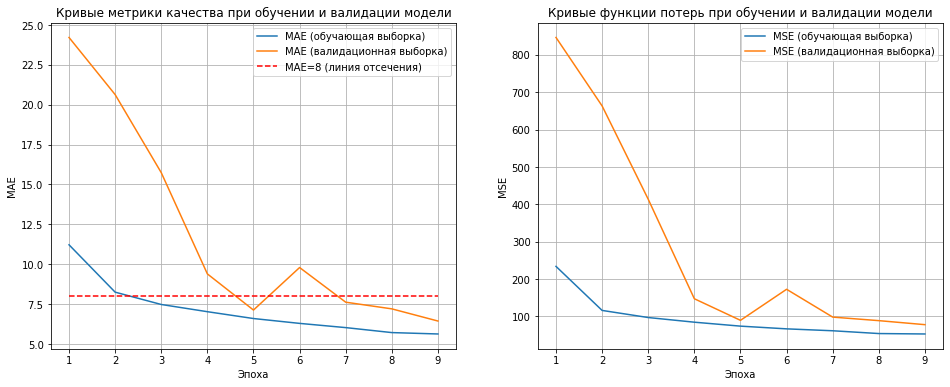

In [10]:
mse_train = [
    233.8895436679852, 116.0779996335318, 97.05961346534164, 
    84.59997018881752, 74.05038851438843, 66.77647654617465, 
    61.67519541460043, 54.218538571710454, 53.08472604352966
]
mse_valid = [
    846.2219065348307, 663.0402526855469, 413.4408915201823, 
    147.30395164489747, 89.58547054926554, 172.61877937316893, 
    98.21711552937826, 88.74565512339274, 77.98550510406494
]
mae_train = [
    11.212002, 8.243419, 7.469898, 
    7.0178504, 6.5893874, 6.284882, 
    6.019999, 5.708039, 5.6210117
] 
mae_valid = [
    24.211443, 20.629568, 15.735516, 
    9.3876095, 7.1211824, 9.78737, 
    7.613475, 7.1953135, 6.432514
]
epochs = [*range(1, 10)]

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(epochs, mae_train, label='MAE (обучающая выборка)')
ax[0].plot(epochs, mae_valid, label='MAE (валидационная выборка)')
ax[0].plot(epochs, 9*[8], 'r--', label='MAE=8 (линия отсечения)')
ax[0].set_title('Кривые метрики качества при обучении и валидации модели')
ax[0].set_xlabel('Эпоха')
ax[0].set_ylabel('MAE')
ax[0].legend()
ax[0].grid()
ax[1].plot(epochs, mse_train, label='MSE (обучающая выборка)')
ax[1].plot(epochs, mse_valid, label='MSE (валидационная выборка)')
ax[1].set_title('Кривые функции потерь при обучении и валидации модели')
ax[1].set_xlabel('Эпоха')
ax[1].set_ylabel('MSE')
ax[1].legend()
ax[1].grid()
fig.show()

Зафиксируем наблюдения: 
 - значения MSE и MAE на обучающей и валидационной выборках последовательно снижались, за исключением 6 эпохи, 
 - на 6 эпохе модель переобучилась, что привело к локальному скачку MSE и MAE на валидационной выборке,  
 - начиная с 7 эпохи, модель показывала качество стабильно ниже линии отсечения (MAE = 8 на валидационной выборке), 
 - модели понадобилось 9 эпох, чтобы достичь MAE = 6.4325 на валидационной выборке. 
 
В текущем состоянии модель подходит для того, чтобы предлагать товары в зависимости от возрастной группы покупателя. Одновременно, она не обеспечивает необходимой точности для возрастного контроля при продаже алкогольной продукции. 
## Выводы
**В ходе обзора данных показано**, что предобработка данных не требуется ([см.3](#%D0%97%D0%B0%D0%B3%D1%80%D1%83%D0%B7%D0%BA%D0%B0-%D0%B8-%D0%BE%D0%B1%D0%B7%D0%BE%D1%80-%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85)).

**Исследовательский анализ показал**, что при удовлетворительном качестве данных ([см.4.1](#%D0%9F%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA-%D0%B2%D0%BE%D0%B7%D1%80%D0%B0%D1%81%D1%82%D0%B0)) и их разметки ([см.4.2](#%D0%9F%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA-%D1%84%D0%BE%D1%82%D0%BE)), присутствуют факторы, способные ослабить предсказательную способность модели, а именно: 
 - подавляющее большинство участников выборки - в возрасте от 15 до 40 лет, 
 - возможно, выборка составлена с округлением возраста, 
 - в выборке представлены люди различных рас, 
 - на многих фото присутствуют предметы, загораживающие и/или меняющие лицо (головные уборы, очки, наушники, микрофоны, кружки), 
 - на большинстве фото у людей не нейтральное выражение лица. 

**В ходе обучения и валидации:** ([см.5.1](#%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5-%D0%B8-%D0%B2%D0%B0%D0%BB%D0%B8%D0%B4%D0%B0%D1%86%D0%B8%D1%8F))
 - обучающая и валидационная выборки определены в соотношении 0.75/0.25, 
 - с применением аугментаций, весов ImageNet, алгоритма оптимизации Adam и механизма Early Stopping обучена и валидирована сверточная нейронная сеть ResNet50, 
 - к 9 эпохе достигнуто значение MAE = 6.4325 на валидационной вборке. 

**В ходе анализа показано следующее:** ([см.5.2](#%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7))
 - на протяжении 9 эпох качество модели последовательно росло, и лишь 6 эпоха была отмечена переобучением, 
 - начиная с 7 эпохи, модель показывала качество стабильно ниже критического значения MAE = 8, 
 - достигнутого качества хватает для того, чтобы предлагать товары в зависимости от возрастной группы покупателя, но недостаточно для возрастного контроля при продаже алкогольной продукции.